In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM

In [2]:
G = 7
# L = 0

# Generating a reasonably large $\Im \Sigma$

In [3]:
out_folder = 'test_Sigma_lowres2/'

In [4]:
G = 7
L = 0.5

In [5]:
erange = linspace(-5, 5, 501)
qrange = linspace(0, 5, 51)
eps = 1e-3
quark_run = Particle(0.6, qrange, erange, eps=eps)

In [6]:
screen = 5.5

In [8]:
Trange = linspace(0.15, 0.55, 10)

In [12]:
for T in Trange:
    print('T = ', T)
    chss = []
    pts = []
    ptss = []

    delta = 1
    while delta > 1e-3:
        channels_Q = dict()

        channels_Q['qq3'] = Channel(quark_run, quark_run, T, G=G, ds=4, da=3, Fa=1/2, screen=screen)
        channels_Q['qq6'] = Channel(quark_run, quark_run, T, G=G, ds=4, da=6, Fa=1/4, screen=screen)
        channels_Q['qa1'] = Channel(quark_run, quark_run, T, G=G, ds=4, da=1, Fa=1, screen=screen)
        channels_Q['qa8'] = Channel(quark_run, quark_run, T, G=G, ds=4, da=8, Fa=1/8, screen=screen)

        channels = {k : c for k, c in list(channels_Q.items())}

        for k, ch in channels.items():
            print(k)
            ch.populate_T()
            ch.populate_S()
    #     break

        ImS_Q = sum([c.ds * c.da * c.ImS / c.p_i.d for k, c in channels_Q.items()], axis=0)
        ReS_Q = sum([c.ds * c.da * c.ReS / c.p_i.d for k, c in channels_Q.items()], axis=0)

        om0_k = np.array([quark_run.om0(quark_run.qrange) for e in quark_run.erange])
        arrE = np.array([quark_run.erange for q in quark_run.qrange]).transpose()

        G_Q_new = 1/(arrE - om0_k + 1j*quark_run.eps - (ReS_Q + 1j*ImS_Q))

        quark_new = Particle(quark_run.m, qrange, erange, eps=eps, Gtab=G_Q_new)
        
        chss += [channels_Q]
        pts += [quark_run]

        delta = sqrt(sum((quark_new.Rtab - quark_run.Rtab)**2)) / len(erange) / len(qrange)
#         delta += sqrt(sum((gluon_new.Rtab - gluon_run.Rtab)**2)) / len(erange) / len(qrange)
#         delta /= 2
        print(delta)
    
        quark_run = quark_new
    
    cQ = chss[-1]
    
    for k, c in cQ.items():
        np.savetxt(out_folder + 'Q_TM_'+k+'_T=%.3f.dat'%T, c.TM)
        np.savetxt(out_folder + 'Q_ImS_'+k+'_T=%.3f.dat'%T, c.ImS)
        np.savetxt(out_folder + 'Q_ReS_'+k+'_T=%.3f.dat'%T, c.ReS)
        
    np.savetxt(out_folder + 'Q_Rho_T=%.3f.dat'%T, pts[-1].Rtab)
    
    np.savetxt(out_folder + 'Q_Gtab_T=%.3f.dat'%T, pts[-1].Gtab)
    
    np.savetxt(out_folder + 'erange_T=%.3f.dat'%T, erange)
    np.savetxt(out_folder + 'qrange_T=%.3f.dat'%T, qrange)
    
    



T =  0.15
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.10361139421686456
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.030487151993644494
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.013730132968031895
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.007628243065102707
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.00260856213581514
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0012286573028091766
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0004360303376157581
T =  0.19444444444444445
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.023959299413086232
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.019597688372029434
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.004039096059092145
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.000255922491197275
T =  0.23888888888888887
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.01377752896662757
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.008377918119931813
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0034719796293659947
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.00030379464287125956
T =  0.2833333333333333
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.008614751482697618
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.001517268668110296
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0007776236467090807
T =  0.3277777777777778
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.006850972924071626
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0031835425866963015
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0021279546304813542
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0005274412022849086
T =  0.37222222222222223
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.00838768710581666
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0034633628370992257
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0010955731222133864
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.00032551599587137605
T =  0.41666666666666663
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.01135345312763798
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.005050755649328845
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0018321656250580136
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.000490722219527184
T =  0.46111111111111114
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.011686333176685318
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.007225621031518306
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0029220153242702296
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0008582965987636116
T =  0.5055555555555555
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.014351885575000336
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.004676794080871965
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.001580149823298253
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.001091975118703785
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.00038992934730448016
T =  0.55
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.015488015026723822
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.006512382534020291
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0019689321450177995
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0011117055883309395
qq3


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qq6


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa1


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

qa8


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.0007167139094262395


In [ ]:
for pt in pts:
    plt.plot(erange, pt.Rtab[:, 0])
    
plt.ylim(0, 0.1)
plt.xlim(0, 1)

## Testing the data 

In [16]:
Trange = Trange[:-1]

(0.0, 2.0)

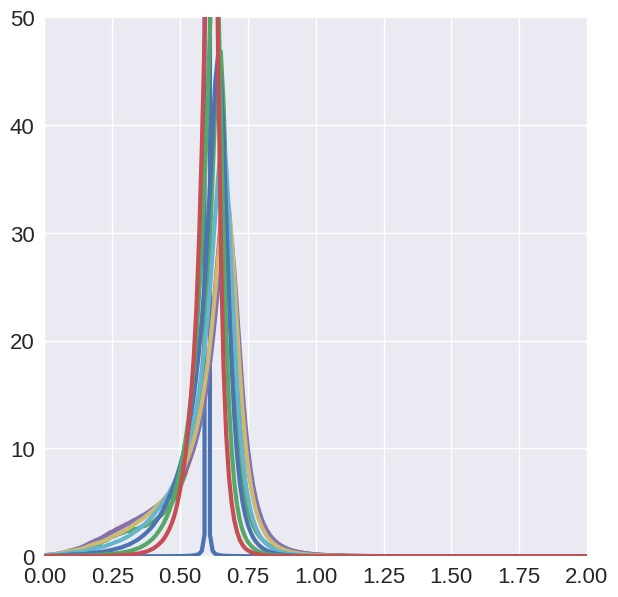

In [17]:
OmS = []
OmQ = []

for T in Trange[::1]:
    Gtab_test = np.loadtxt(out_folder + 'Q_Gtab_T=%.3f.dat'%T, dtype=complex)
    quark_test = Particle(0.6, qrange, erange, eps=0, Gtab=Gtab_test)
    ImS_test = np.loadtxt(out_folder + 'Q_ImS_qa1_T=%.3f.dat'%T)
    ReS_test = np.loadtxt(out_folder + 'Q_ReS_qa1_T=%.3f.dat'%T)
    
    plt.plot(erange, -2*imag(Gtab_test[:, 0]))
    
    iImS = tm.Interpolator2D(qrange, erange, ImS_test)
    iReS = tm.Interpolator2D(qrange, erange, ReS_test)

    q = quark_test

    OmS += [tm.OmS_F(T, q.iImG, q.iReG, iImS, iReS)]
    OmQ += [tm.OmQ_F(T, q.iImG, q.iReG)]
    
plt.ylim(0, 50)
plt.xlim(0, 2)

FileNotFoundError: test_Sigma_screen=3.5/Q_Gtab_T=0.283.dat not found.

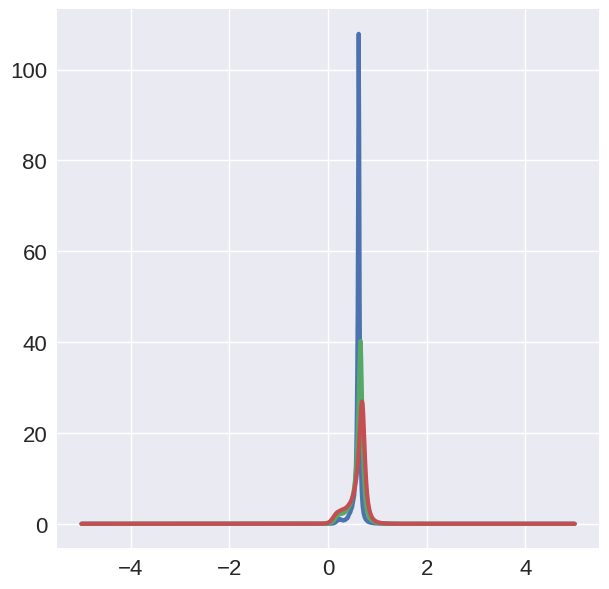

In [13]:
OmS = []
OmQ = []

out_folder = 'test_Sigma_screen=3.5/'

qrange = loadtxt(out_folder + 'qrange_T=0.150.dat')
erange = loadtxt(out_folder + 'erange_T=0.150.dat')

lines = []

for T in Trange[::1]:
    Gtab_test = np.loadtxt(out_folder + 'Q_Gtab_T=%.3f.dat'%T, dtype=complex)
    quark_test = Particle(0.6, qrange, erange, eps=0, Gtab=Gtab_test)
    ImS_test = np.loadtxt(out_folder + 'Q_ImS_qa1_T=%.3f.dat'%T)
    ReS_test = np.loadtxt(out_folder + 'Q_ReS_qa1_T=%.3f.dat'%T)
    
    lines += plt.plot(erange, -2*imag(Gtab_test[:, 0]))
    
    iImS = tm.Interpolator2D(qrange, erange, ImS_test)
    iReS = tm.Interpolator2D(qrange, erange, ReS_test)

    q = quark_test

    OmS += [tm.OmS_F(T, q.iImG, q.iReG, iImS, iReS)]
    OmQ += [tm.OmQ_F(T, q.iImG, q.iReG)]
    
plt.ylim(0, 50)
plt.xlim(0, 2)

OmS = []
OmQ = []

out_folder = 'test_Sigma/'

qrange = loadtxt('test_Sigma/qrange_T=0.150.dat')
erange = loadtxt('test_Sigma/erange_T=0.150.dat')

for line, T in zip(lines, Trange[::1]):
    Gtab_test = np.loadtxt(out_folder + 'Q_Gtab_T=%.3f.dat'%T, dtype=complex)
    quark_test = Particle(0.6, qrange, erange, eps=0, Gtab=Gtab_test)
    ImS_test = np.loadtxt(out_folder + 'Q_ImS_qa1_T=%.3f.dat'%T)
    ReS_test = np.loadtxt(out_folder + 'Q_ReS_qa1_T=%.3f.dat'%T)
    
    plt.plot(erange, -2*imag(Gtab_test[:, 0]), ls=':', c=line.get_c())
    
    iImS = tm.Interpolator2D(qrange, erange, ImS_test)
    iReS = tm.Interpolator2D(qrange, erange, ReS_test)

    q = quark_test

    OmS += [tm.OmS_F(T, q.iImG, q.iReG, iImS, iReS)]
    OmQ += [tm.OmQ_F(T, q.iImG, q.iReG)]
    
plt.ylim(0, 150)
plt.xlim(0, 1)

In [ ]:
q0 = Particle(0.6, qrange, erange, eps=1e-3)

OmQ0 = array([tm.OmQ_F(T, q0.iImG, q0.iReG) for T in Trange])

In [14]:
OmS = array(OmS)
OmQ = array(OmQ)

In [15]:
Pfree = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, np.inf)[0] for T in Trange])

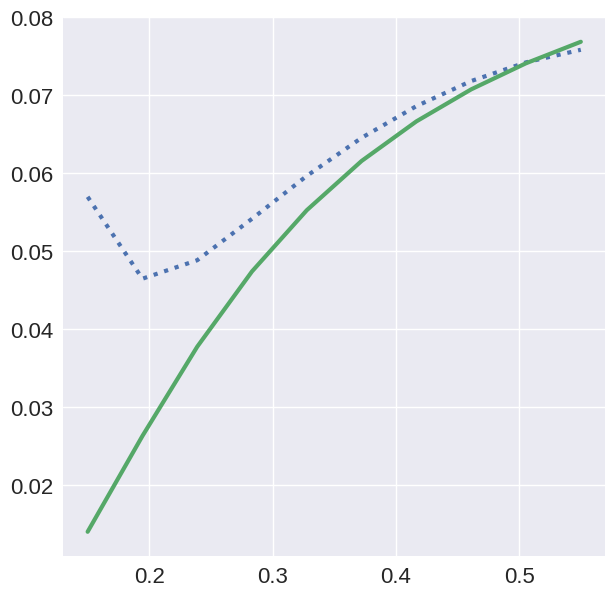

In [16]:
plt.plot(Trange, OmQ0/Trange**4, ls=':')
plt.plot(Trange, Pfree/Trange**4)

In [17]:
plt.plot(Trange, -OmS/Trange**4, label='self-energy')
# plt.plot(Trange, (OmQ + OmS)/Trange**4)
plt.plot(Trange, (OmQ)/Trange**4, label='log')
# plt.plot(Trange, OmQ0/Trange**4, ls=':', label='qp w. width')
plt.plot(Trange, Pfree/Trange**4, c='black', ls='--', label='qp')

plt.ylabel('P/T^4')

plt.xlabel('T [GeV]')

plt.legend()

ValueError: operands could not be broadcast together with shapes (3,) (10,) 

In [18]:
plt.plot(Trange, OmQ/Pfree)
# plt.plot(Trange, Pfree)

ValueError: operands could not be broadcast together with shapes (3,) (10,) 